# Exploratory Data Analysis Project


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [14]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# import warnings to suppress userWarnings etc.
import warnings as w
w.filterwarnings('ignore')

### Understanding the structure of the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/AIML_UTA/Python Foundation/Project/foodhub_order.csv')
# returns the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

**Shape of the data set**

In [4]:
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:
There are 1898 rows and 9 columns present in the dataset


**Data Types and Null counts**

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
1. There are no missing values in the dataset
2. Data belong to 3 data types, 4 columns of integers, 4 columns of object data type and 1 column of float type.
3. Data frame uses 133.6+ KB of space


**Missing Values**

In [6]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values in the dataset.


**Checking for Duplicates**

In [7]:
# checking for any duplicates
df.duplicated().sum()

0

There are no duplicates in the data set.

**Check the statistical summary of the data**

In [8]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.000,NaN,NaN,NaN,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,NaN,NaN,NaN,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.000,NaN,NaN,NaN,16.499,7.484,4.470,12.080,14.140,22.297,35.410
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.000,NaN,NaN,NaN,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,NaN,NaN,NaN,24.162,4.973,15.000,20.000,25.000,28.000,33.000


#### Observations:
Minimum food preparation time is 20 minutes.

Average food preparation time is 27 minutes.

Maximum food preparation time is 35 minutes.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

**Observations on Customer_id**

In [9]:
# Let's check how many unique customer id are there
df['customer_id'].nunique()

1200

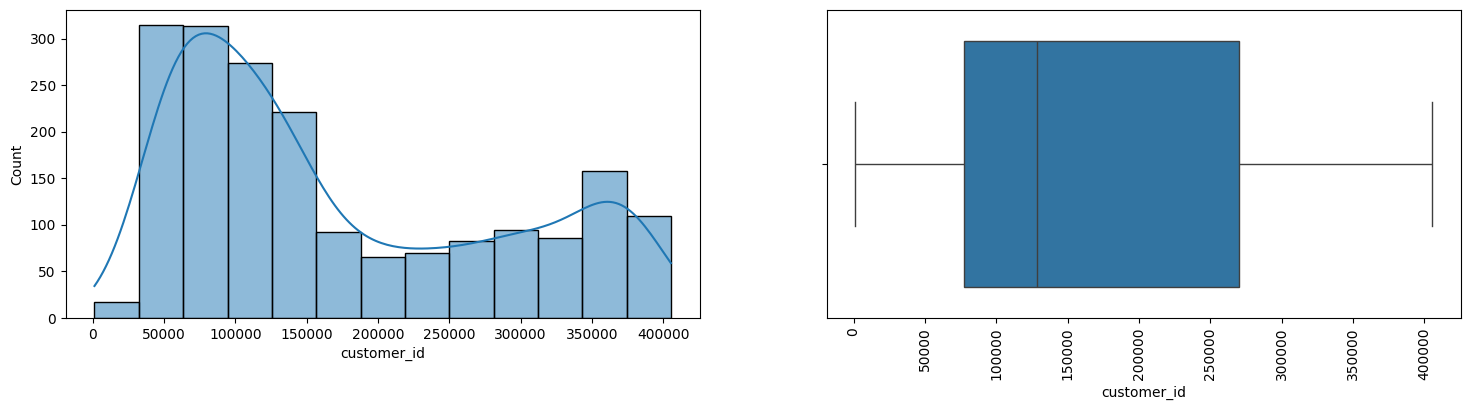

In [10]:
# Let's plot the customer ids
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

sns.histplot(ax=axes[0], data=df,x='customer_id', kde=True)
plt.xticks(rotation=90)
sns.boxplot(ax=axes[1], data=df,x='customer_id')
plt.xticks(rotation=90)
plt.show()

**Observations:**

There are only 1200 unique customer id in the data set.

Histplot s used instead of countplot to avoid clutter. Histogram will help arrange the ids in bins based on the number.

Customer_id shows a binomial distribution, but it has no meaning because the variable is an unique identifier. According to this plot some of the customers have placed orders more frequently as showed by the two peaks, than some random customers who might be not regular customers. Data shows no outliers.

**Observations on restaurant_name:**

In [11]:
# Let's check how many restaurants are there
df['restaurant_name'].nunique()

178

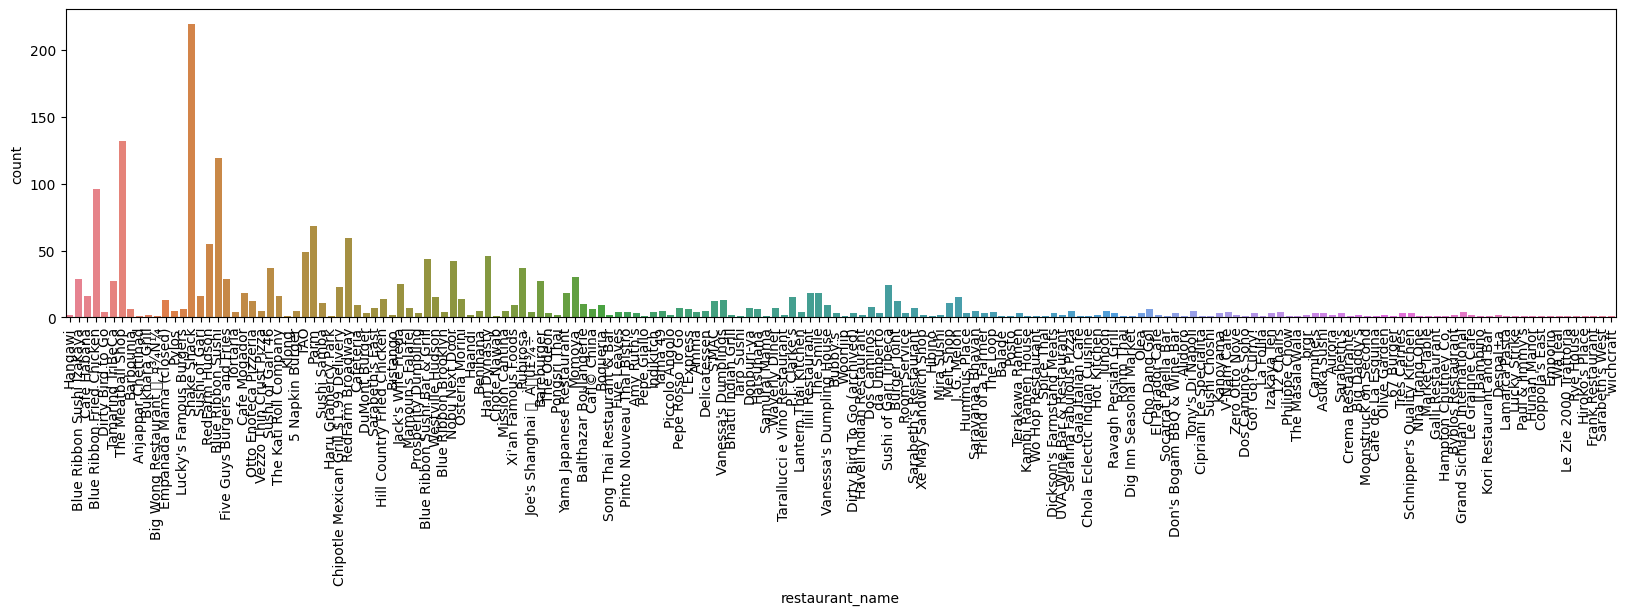

In [15]:
# Plot the restaurants to get the frequency in each
plt.figure(figsize=(20,4))
sns.countplot(data=df,x='restaurant_name', hue='restaurant_name')
plt.xticks(rotation=90)
plt.show()

Observations:

There are 178 unique restaurants in the data set.

Some of the restaurants are very popular. Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken are the top 4 restaurants based on order counts.






**Observations on cuisine_type:**

In [16]:
# Number of unique cuisine types
df['cuisine_type'].nunique()

14

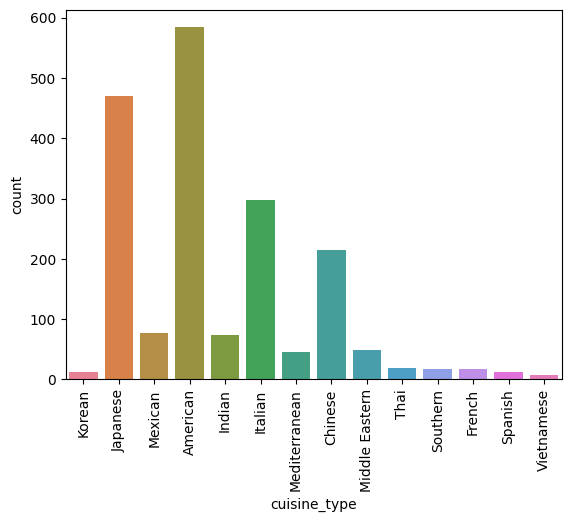

In [17]:
# Let's check the cuisine types for their frequencies in each
sns.countplot(data=df,x='cuisine_type', hue='cuisine_type')
plt.xticks(rotation=90)
plt.show()

**Observations on cuisine_type:**

There are 14 cuisine types.

American cuisines are preferred by most customers. The next favorite food type is Japanese food.

Customers prefer Italian food over Chinese food.

Preference for the Mexican and Indian food are similar.

**Observations on cost_of_the_order:**

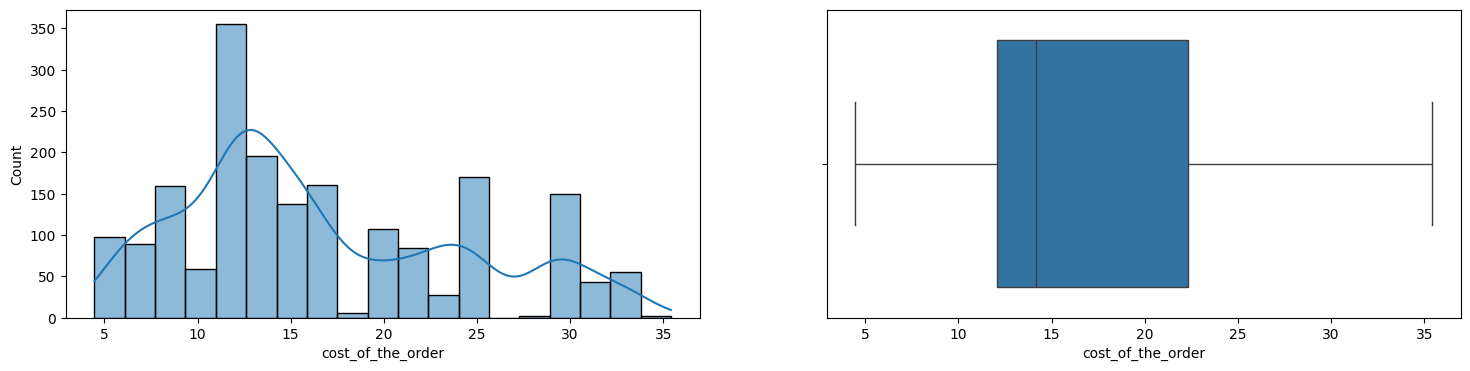

In [18]:
# Check the cost of the order
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

sns.histplot(ax=axes[0], data=df,x='cost_of_the_order', kde=True)
sns.boxplot(ax=axes[1], data=df,x='cost_of_the_order')
plt.show()

**Observations on cost_of_the_order:**

Cost of the order shows a polynomial distribution, this could be due to multiple factors affecting the cost, such as cuisine type and restaurant etc.
There are no outliers.

50% of the orders are between 12 to 23 dollars.

The minimum cost of a order is less than 5 dollars while maximum cost is around 35 dollars.

**Observations on day_of_the_week:**

In [19]:
# Let's check the unique values in day of the week
df['day_of_the_week'].nunique()

2

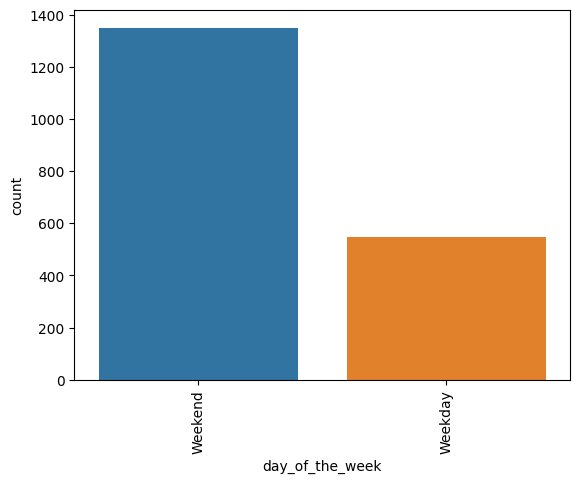

In [20]:
# Let's plot the day of the week
sns.countplot(data=df,x='day_of_the_week', hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

**Observations on day_of_the_week:**

The day of the week is given as either weekday or weekend
During the weekends customers tend to order more food than the weekdays.

**Observations on rating:**

In [21]:
# Let's see what are unique values in rating
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

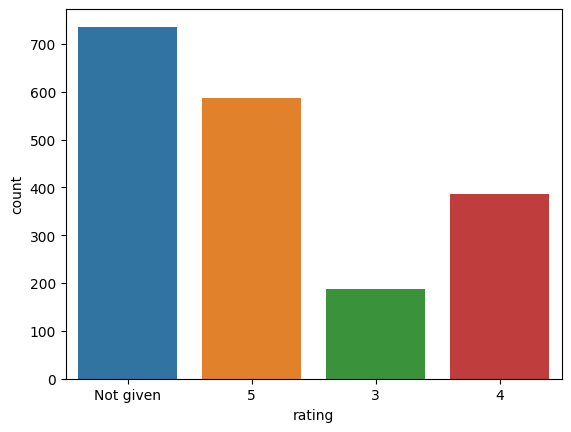

In [22]:
# Let's plot rating
sns.countplot(data=df,x='rating', hue='rating')
plt.show()

**Observations on rating:**

The rating column has 4 different types, they are as 'Not given', 5, 4, and 3.
Majority of the food orders are not rated.

Amongst the rated orders, most of them are rated 5, then 4 and then 3. There are no orders rated below 3.

**Observations on food_preparation_time:**

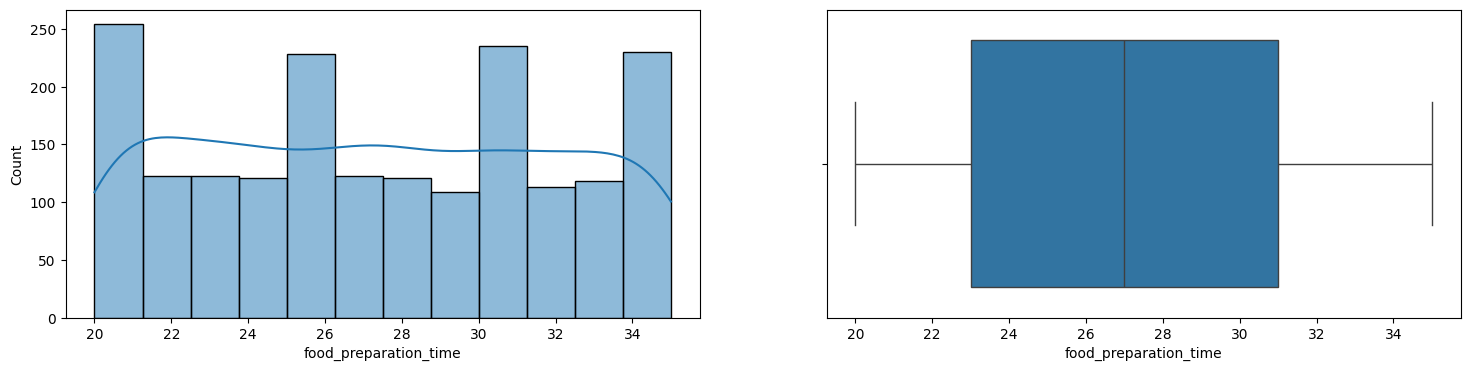

In [23]:
# Let's plot food preparation time
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

sns.histplot(ax=axes[0], data=df,x='food_preparation_time', kde=True)
sns.boxplot(ax=axes[1], data=df,x='food_preparation_time')
plt.show()

**Observations on food_preparation_time:**

The food preparation time shows more or less uniform distribution.
While there are no outliers, 50% of the orders took about 23 to 33 minutes preparation time as shown by the boxplot.

Minimum food preparation time is about 20 minutes, while maximum food preparation time is about 35 minutes.

**Observations on delivery_time:**

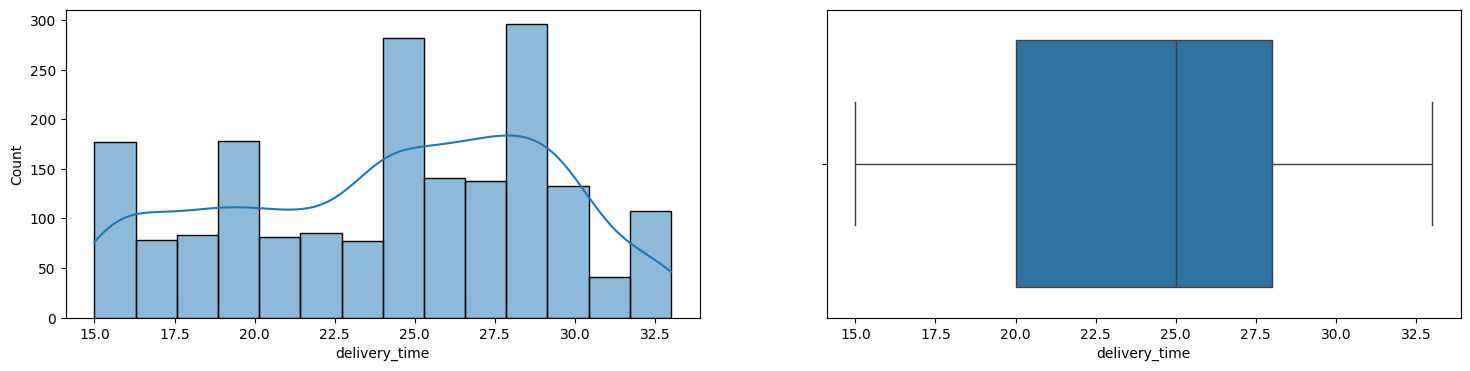

In [24]:
# Let's plot delivery time
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

sns.histplot(ax=axes[0], data=df,x='delivery_time', kde=True)
sns.boxplot(ax=axes[1], data=df,x='delivery_time')
plt.show()

**Observations on delivery_time:**

Delivery time has a slight left skewed distribution and there are no outliers.

50% of the orders are delivered within 20 to 28 minutes, minimum time of delivery is about 15 minutes. And maximum time is about 33 minutes.

**5 restaurants in terms of the number of orders received**

In [25]:
# Let's group the restaurant name based on the orders received
df.groupby(['restaurant_name'])['order_id'].count().sort_values(ascending=False).head(10)

restaurant_name
Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: order_id, dtype: int64

**Observations:**

The top 5 restaurants that received highest number of orders are;
Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm respectively.

**The most popular cuisine on weekends**

In [26]:
# Let's filter the data set to get the weekend orders
pop_weekend = df[df['day_of_the_week']=='Weekend']
#pop_weekend
pop_weekend.groupby(['cuisine_type'])['order_id'].count().sort_values(ascending=False).head(10)

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Name: order_id, dtype: int64

**Observations:**
The most popular cuisine on weekend is American cuisine, which has 415 orders during the weekend.

**Percentage of the orders cost more than 20 dollars**

In [27]:
# Let's count the number of orders more than $20 and get the percentage of it
df_result = df[(df['cost_of_the_order']>20)].count()
print('There are ',df_result['cost_of_the_order'], 'orders cost more than $20')
Percentage = ((df_result['cost_of_the_order'])/len(df['cost_of_the_order']))*100
print('Cost more than $20 orders are about ', round(Percentage, ndigits=2), '% of the total orders', sep='')

There are  555 orders cost more than $20
Cost more than $20 orders are about 29.24% of the total orders


**Mean order delivery time**

In [28]:
print('The mean delivery time for an order is ', round(df['delivery_time'].mean(), ndigits=2), 'minutes')

The mean delivery time for an order is  24.16 minutes


**The most frequent customers who receives 20% discount vouchers**

In [29]:
df.groupby(['customer_id'])['order_id'].count().sort_values(ascending=False).head(3)

customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64

**Observations:**
The top 3 frequent customers are; customer ids 52832, 47440 and 83287 with number of orders 13, 10 and 9 respectively.

## **Multivariate Analysis**

In [30]:
# Lets make some important variables using existing variables for future use.

df['avg_del_time_per_rest'] = df.groupby(['restaurant_name'])['delivery_time'].transform('mean')
df['avg_foodprep_time_per_rest'] = df.groupby(['restaurant_name'])['food_preparation_time'].transform('mean')
df['total_time_per_rest'] = df['food_preparation_time'] + df['delivery_time']
df['total_time_avg_per_rest'] = df.groupby(['restaurant_name'])['total_time_per_rest'].transform('mean')
df['avg_cost_per_rest'] = df.groupby(['restaurant_name'])['cost_of_the_order'].transform('mean')
df['order_count'] = df.groupby(['restaurant_name'])['order_id'].transform('count')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_id                    1898 non-null   int64  
 1   customer_id                 1898 non-null   int64  
 2   restaurant_name             1898 non-null   object 
 3   cuisine_type                1898 non-null   object 
 4   cost_of_the_order           1898 non-null   float64
 5   day_of_the_week             1898 non-null   object 
 6   rating                      1898 non-null   object 
 7   food_preparation_time       1898 non-null   int64  
 8   delivery_time               1898 non-null   int64  
 9   avg_del_time_per_rest       1898 non-null   float64
 10  avg_foodprep_time_per_rest  1898 non-null   float64
 11  total_time_per_rest         1898 non-null   int64  
 12  total_time_avg_per_rest     1898 non-null   float64
 13  avg_cost_per_rest           1898 

In [31]:
#Lets filter the dataframe based on rating and create a new dataframe named df_rating

df_rating = df[df["rating"] != 'Not given']
print(df_rating['rating'].value_counts())
print(df_rating.shape)

#Lets convert the rating datatype to float
df_rating['rating'] = df_rating['rating'].astype(int)
print(df_rating.info())
w.filterwarnings('ignore');  # suppressed an SettingWithCopyWarning

rating
5    588
4    386
3    188
Name: count, dtype: int64
(1162, 15)
<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_id                    1162 non-null   int64  
 1   customer_id                 1162 non-null   int64  
 2   restaurant_name             1162 non-null   object 
 3   cuisine_type                1162 non-null   object 
 4   cost_of_the_order           1162 non-null   float64
 5   day_of_the_week             1162 non-null   object 
 6   rating                      1162 non-null   int64  
 7   food_preparation_time       1162 non-null   int64  
 8   delivery_time               1162 non-null   int64  
 9   avg_del_time_per_rest       1162 non-null   float64
 10  avg_foodprep_time_per_rest  1162 non-null   float64
 11  total_time_per_rest         1162 non-null   int64  
 12  total_time_avg_per_rest 

In [32]:
# Lets create some new columns in df_rating for the future use

df_rating['rating_count_per_rest'] = df_rating.groupby(['restaurant_name'])['rating'].transform('count')
df_rating['rating_sum_per_rest'] = df_rating.groupby(['restaurant_name'])['rating'].transform('sum')
df_rating['avg_rating_per_rest'] = df_rating['rating_sum_per_rest']/df_rating['rating_count_per_rest']
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_id                    1162 non-null   int64  
 1   customer_id                 1162 non-null   int64  
 2   restaurant_name             1162 non-null   object 
 3   cuisine_type                1162 non-null   object 
 4   cost_of_the_order           1162 non-null   float64
 5   day_of_the_week             1162 non-null   object 
 6   rating                      1162 non-null   int64  
 7   food_preparation_time       1162 non-null   int64  
 8   delivery_time               1162 non-null   int64  
 9   avg_del_time_per_rest       1162 non-null   float64
 10  avg_foodprep_time_per_rest  1162 non-null   float64
 11  total_time_per_rest         1162 non-null   int64  
 12  total_time_avg_per_rest     1162 non-null   float64
 13  avg_cost_per_rest           1162 non-n

**Observations on heat map:**

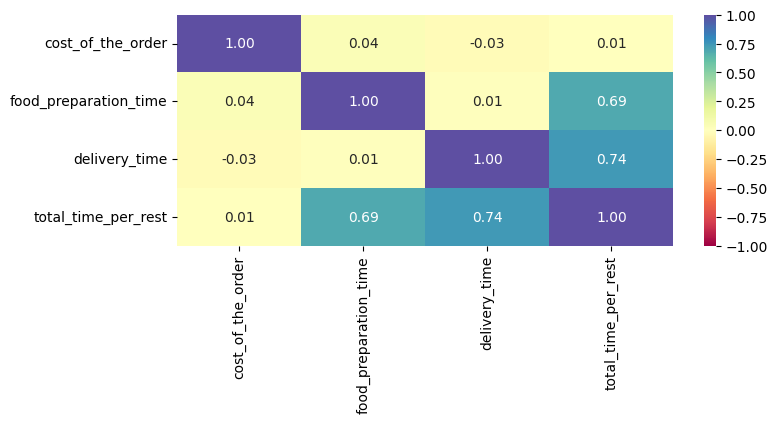

In [33]:
# Let's see if there are any relationship exists between cost and time for the entire data set
df_select = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'total_time_per_rest']]
plt.figure(figsize=(8, 3))
sns.heatmap(df_select.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations:**

It looks like cost of the order has no significant correlation with the food preparation time or delivery time.

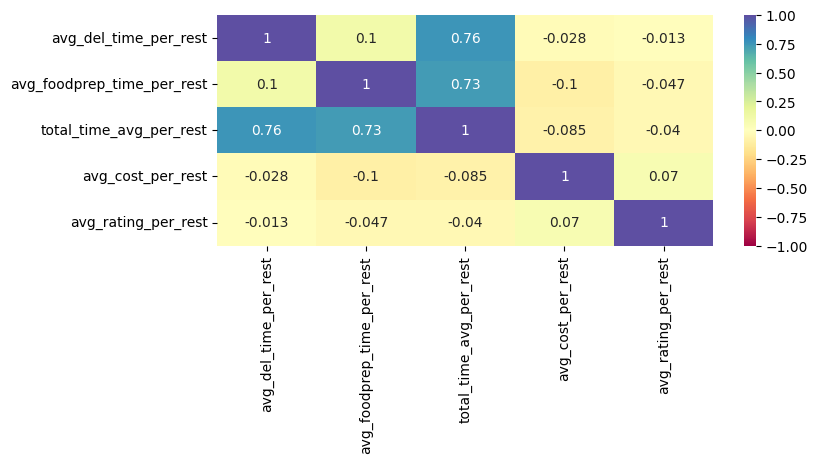

In [34]:
# Let's see if there are any relationship exists between rating and other variables for the df_rating data frame
df_rating_select = df_rating[['avg_del_time_per_rest', 'avg_foodprep_time_per_rest',
       'total_time_avg_per_rest', 'avg_cost_per_rest', 'avg_rating_per_rest']]
plt.figure(figsize=(8,3))
sns.heatmap(df_rating_select.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

**Observations:**

We would expect some correlation between food delivery time vs rating or cost vs rating. However heat map shows no significant correlations to the above variables to average ratings of the restaurants.

**Total time to delivery vs Restaurant affected by the day of the week:**

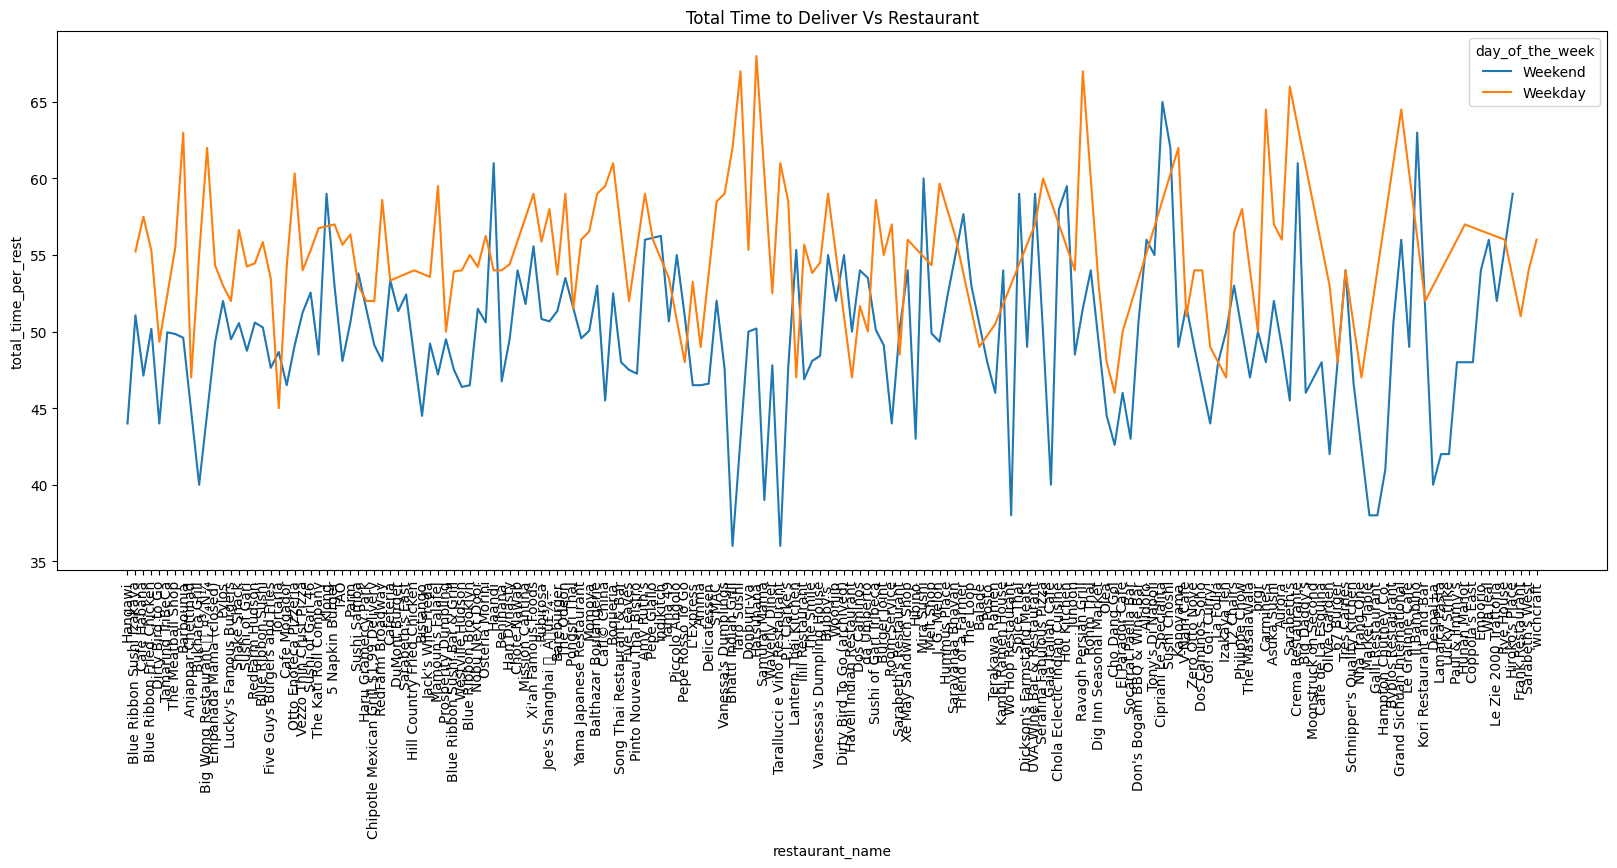

In [35]:
plt.figure(figsize = (20,7))
plt.xticks(rotation=90)
sns.lineplot(data=df, x='restaurant_name', y='total_time_per_rest', hue='day_of_the_week', ci=False).set(title='Total Time to Deliver Vs Restaurant')
plt.show();

Observations:

Total delivery time for the weekdays are higher than the weekends regardless of the restaurant

**Average cost vs Restaurant**

[Text(0.5, 1.0, 'Average Cost Vs Restaurant')]

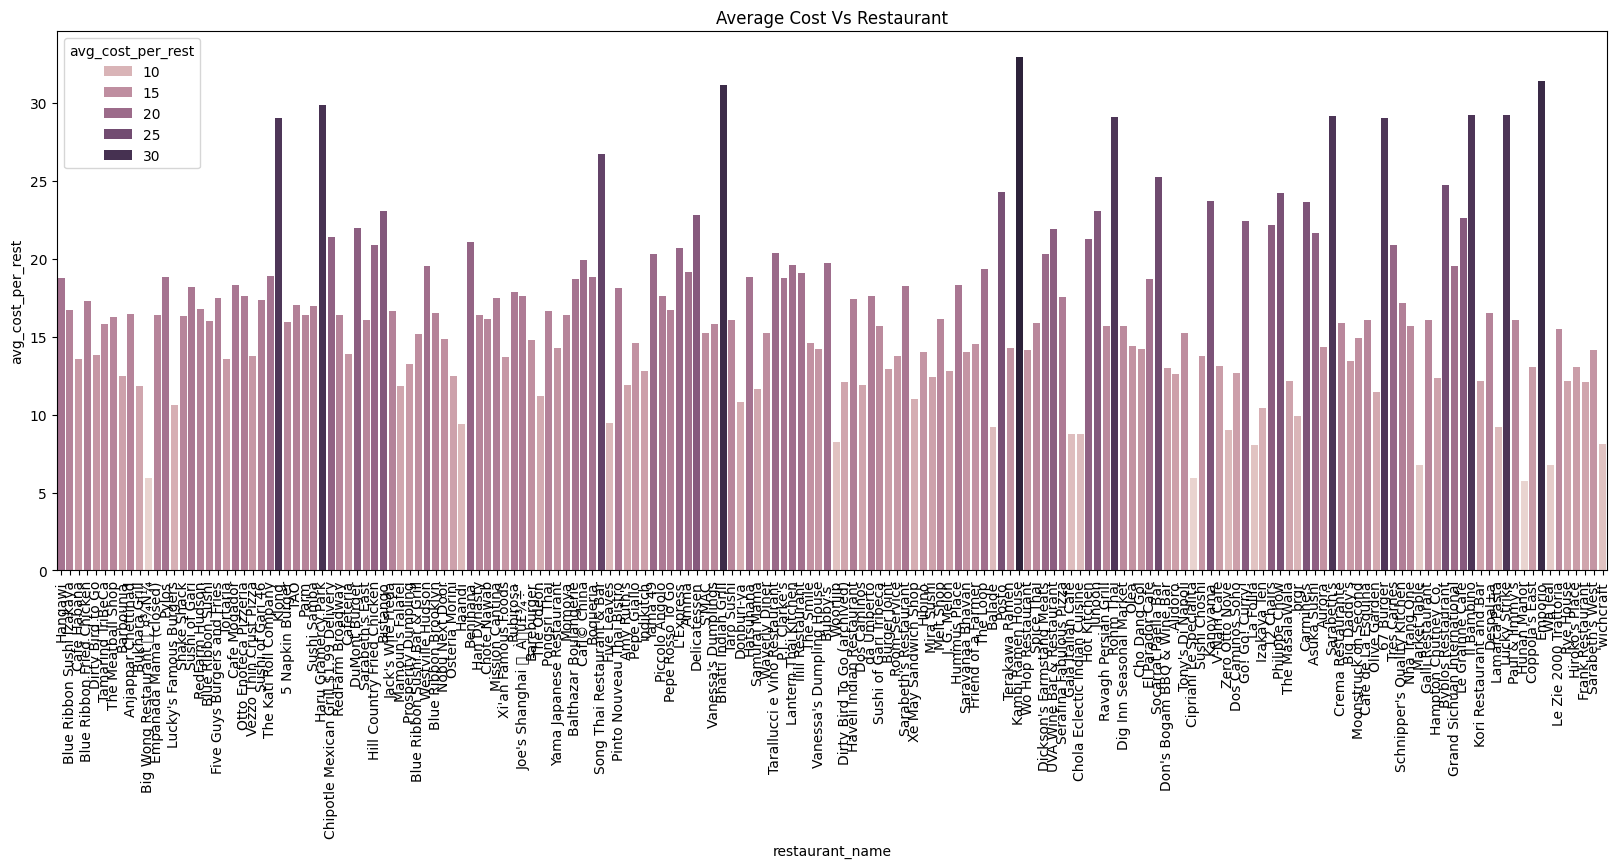

In [36]:
plt.figure(figsize = (20,7))
plt.xticks(rotation=90)
sns.barplot(data=df, x='restaurant_name', y='avg_cost_per_rest', hue='avg_cost_per_rest').set(title='Average Cost Vs Restaurant')

In [37]:
df['avg_cost_per_rest'].describe()

count   1898.000
mean      16.499
std        2.481
min        5.720
25%       15.887
50%       16.345
75%       17.316
max       32.930
Name: avg_cost_per_rest, dtype: float64

In [38]:
df[df['avg_cost_per_rest']>25].count()

order_id                      16
customer_id                   16
restaurant_name               16
cuisine_type                  16
cost_of_the_order             16
day_of_the_week               16
rating                        16
food_preparation_time         16
delivery_time                 16
avg_del_time_per_rest         16
avg_foodprep_time_per_rest    16
total_time_per_rest           16
total_time_avg_per_rest       16
avg_cost_per_rest             16
order_count                   16
dtype: int64

**Observations:**

When consider average cost per restaurant, 50% of the orders are between 15.88 to 17.32 dollars.

There are 16 restaurants in which the average cost is higher than $25.

There are some restaurants where the food is very cheap.

**Average Cost vs Order Count**

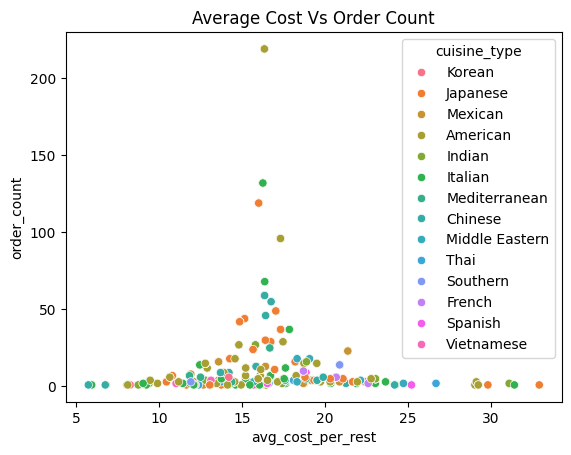

In [39]:
sns.scatterplot(data=df, x='avg_cost_per_rest', y='order_count', hue='cuisine_type').set(title='Average Cost Vs Order Count');

Observations:

It looks like between 15-18 dollars more orders are placed. When the cost is too cheap or expensive the number of orders are low.

**Average rating vs Restaurant**

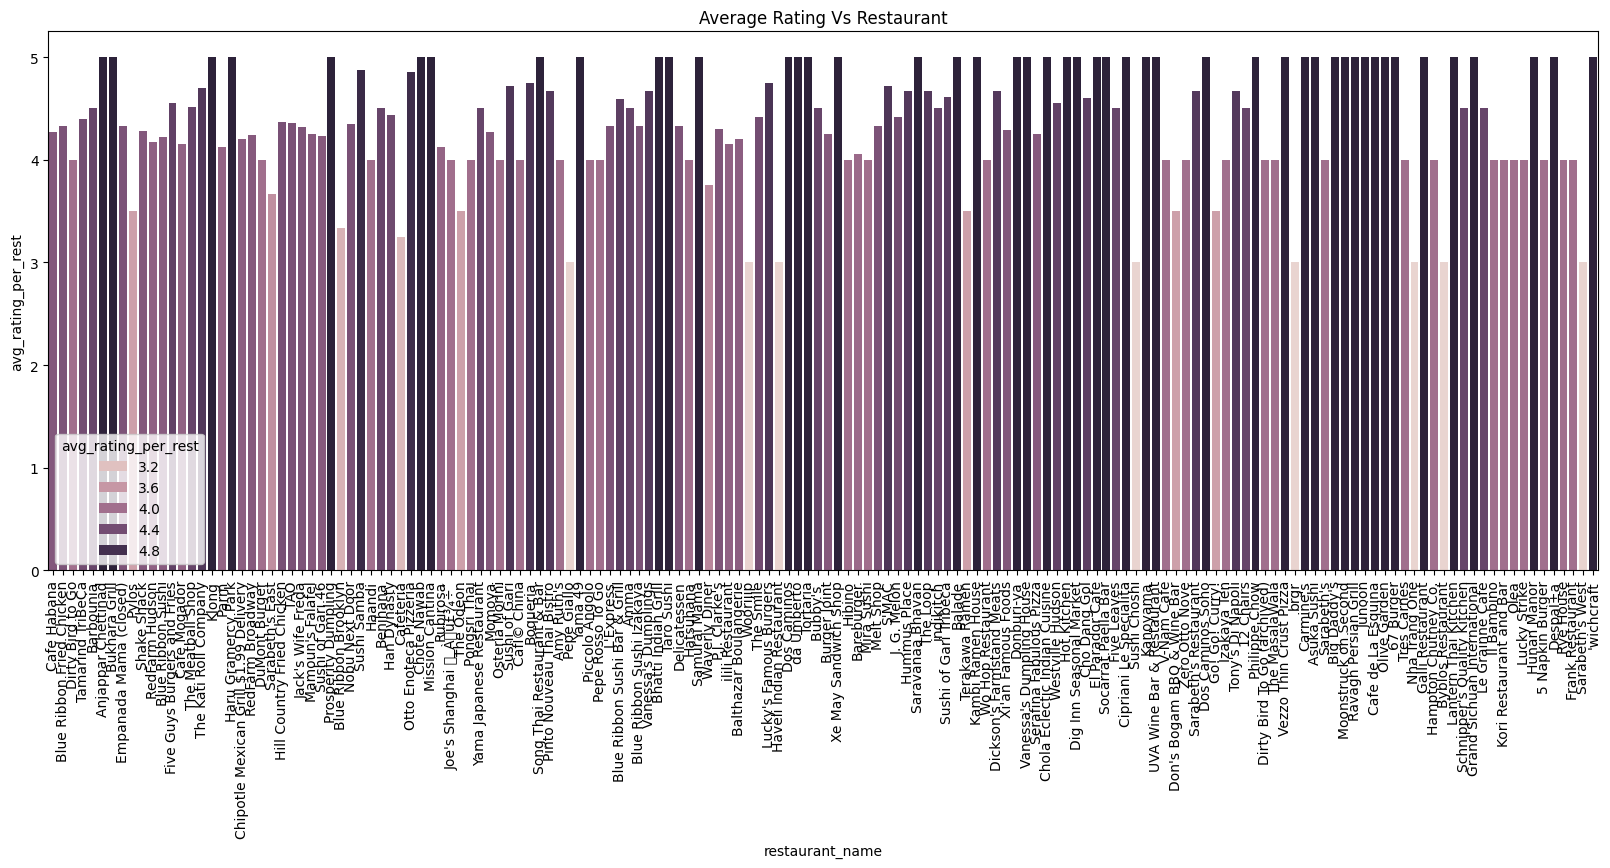

In [40]:
plt.figure(figsize = (20,7))
plt.xticks(rotation=90)
sns.barplot(data=df_rating, x='restaurant_name', y='avg_rating_per_rest', hue='avg_rating_per_rest').set(title='Average Rating Vs Restaurant');

In [41]:
df_filter = df_rating[(df_rating['avg_rating_per_rest']==5)]
df_filter['restaurant_name'].nunique()

47

In [42]:
df_filter = df_rating[(df_rating['avg_rating_per_rest']>=4)]
df_filter['restaurant_name'].nunique()


139

Observations:

There are 47 restaurants with average rating 5.
And 139 restaurants have 4 or more average rating.

**Food Preparation Time Vs Cuisine type**

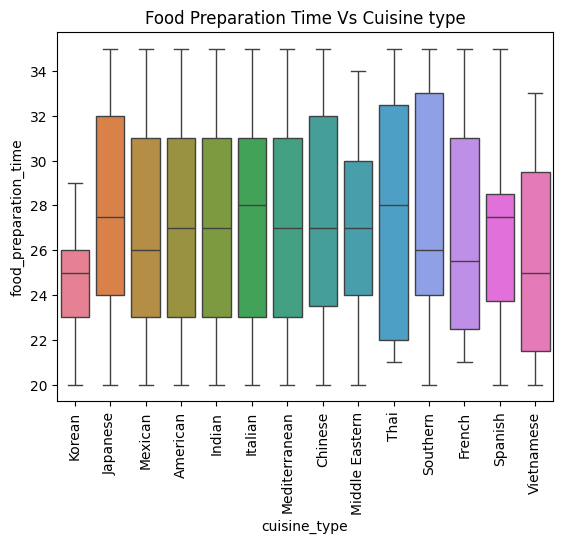

In [43]:
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time', hue='cuisine_type', showfliers=False).set(title='Food Preparation Time Vs Cuisine type')
plt.xticks(rotation=90);

**Observations:**

Median food preparation time is highest for the Italian and Thai restaurants.

Median food preparation time is lowest for the Korean and Vietnamese restaurants.

Range of food preparation time is lowest for the Korean restaurants.

**Cost of the order Vs Cuisine type**

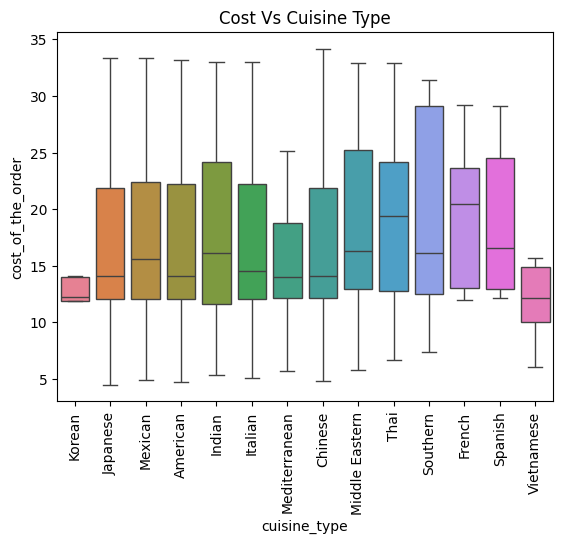

In [44]:
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', hue='cuisine_type', showfliers=False).set(title='Cost Vs Cuisine Type')
plt.xticks(rotation=90);

**Observations:**

Median cost is highest for the French restaurants and least for the Vietnamese restaurants.

Cost range is lowest for the Korean restaurants.

**Delivery time, Food Preparation Time and Total Time vs Day of the week:**

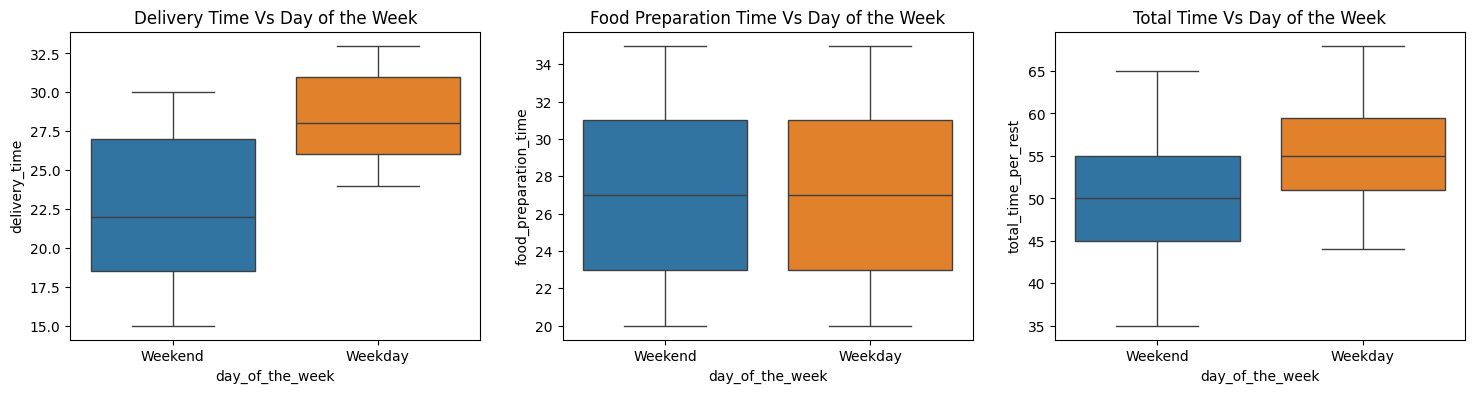

In [45]:
Fig, axes = plt.subplots(1, 3, figsize=(18, 4))
sns.boxplot(ax=axes[0], data=df, x='day_of_the_week', y='delivery_time', hue='day_of_the_week').set(title='Delivery Time Vs Day of the Week')
sns.boxplot(ax=axes[1], data=df, x='day_of_the_week', y='food_preparation_time', hue='day_of_the_week').set(title='Food Preparation Time Vs Day of the Week')
sns.boxplot(ax=axes[2], data=df, x='day_of_the_week', y='total_time_per_rest', hue='day_of_the_week').set(title='Total Time Vs Day of the Week');

**Observations:**

Median delivery time is high for the weekdays than for the weekends.

Regardless of the day, median food preparation time is however do not change.

Total time to food preparation and delivery is therefore again higher for the weekdays than the weekends.

**Average cost vs Day of the week on left and Average rating vs Day of the week on right**

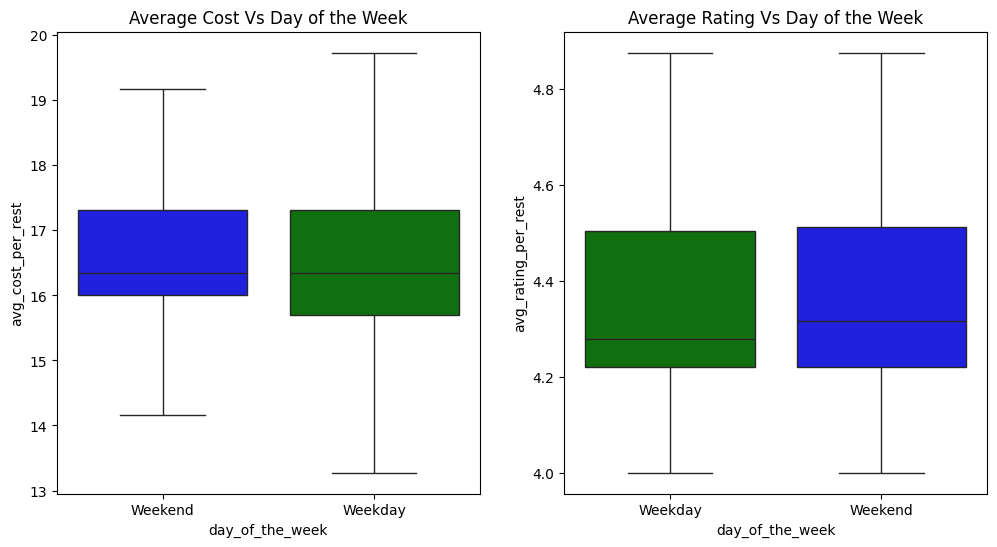

In [46]:
Fig, axes = plt.subplots(1, 2, figsize=(12,6))
my_pal = {"Weekend": "b", "Weekday": "g"}
sns.boxplot(ax=axes[0], data=df, x='day_of_the_week', y='avg_cost_per_rest',  hue='day_of_the_week', palette=my_pal, showfliers=False).set(title='Average Cost Vs Day of the Week')
sns.boxplot(ax=axes[1], data=df_rating, x= 'day_of_the_week',  y='avg_rating_per_rest',hue='day_of_the_week', palette=my_pal, showfliers=False).set(title='Average Rating Vs Day of the Week');

**Observations:**

Median of the average cost per restaurant is same for all days of the week.

However range of the average cost is higher for the weekdays than for the weekend.

Median of the average rating per restaurant is greater for the weekend than weekdays, this could be due to the number of orders on weekends is higher than weekdays.

**Average rating vs Aaverage cost on left and Average rating vs Total time average on right**

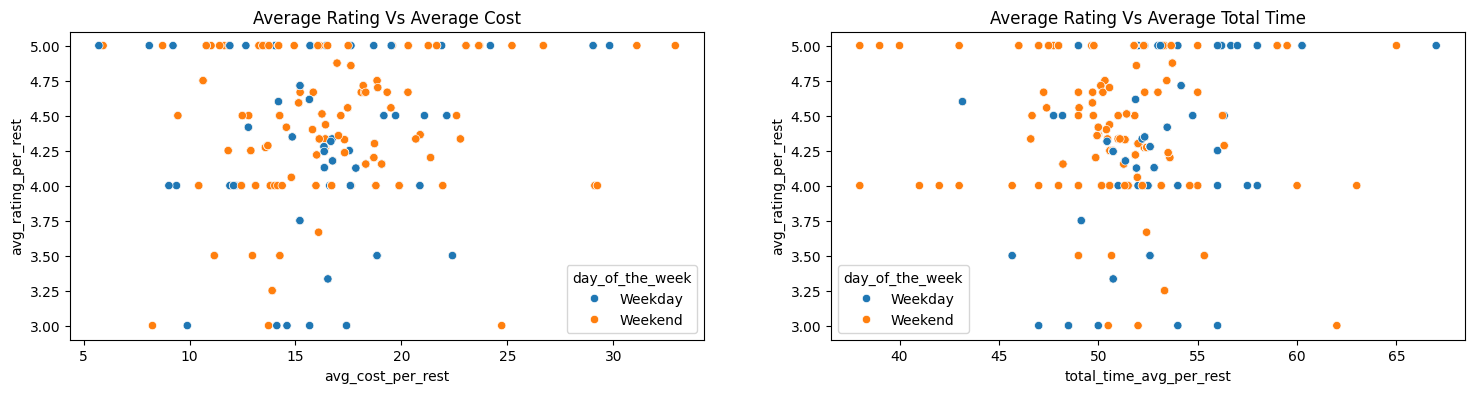

In [47]:
Fig, axes = plt.subplots(1, 2, figsize=(18, 4))
sns.scatterplot(ax=axes[0], data=df_rating, x='avg_cost_per_rest', y='avg_rating_per_rest', hue='day_of_the_week').set(title='Average Rating Vs Average Cost')
sns.scatterplot(ax=axes[1], data=df_rating, x='total_time_avg_per_rest', y='avg_rating_per_rest', hue='day_of_the_week').set(title='Average Rating Vs Average Total Time');

**Observations:**

The average rating shows no correlation to average food cost or the average of total time takes to deliver.

Also it does not show any pattern with the day of the week.

**Average rating vs Average delivery time on left and Average rating vs Average food preparation time on right**

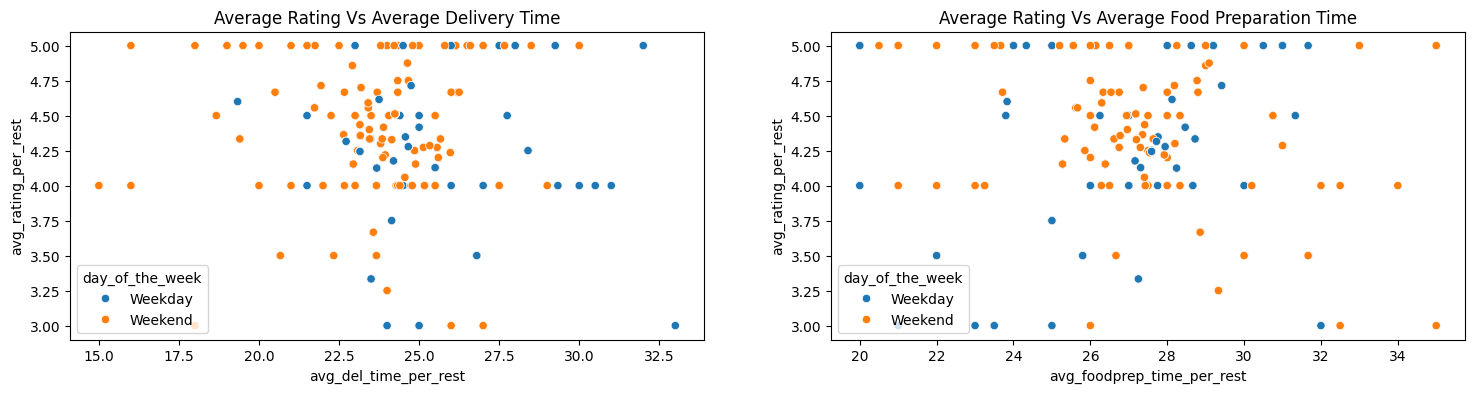

In [48]:
Fig, axes = plt.subplots(1, 2, figsize=(18, 4))
sns.scatterplot(ax=axes[0], data=df_rating, x='avg_del_time_per_rest', y='avg_rating_per_rest', hue='day_of_the_week').set(title='Average Rating Vs Average Delivery Time')
sns.scatterplot(ax=axes[1], data=df_rating, x='avg_foodprep_time_per_rest', y='avg_rating_per_rest', hue='day_of_the_week').set(title='Average Rating Vs Average Food Preparation Time');

**Observations:**

Average rating again shows no correlation to the average delivery time, average food preparation time or the day of the week.

**Restaurants which has rating count of more than 50 and the average rating greater than 4.**

In [49]:
data = df_rating.loc[(df_rating['rating_count_per_rest'] >50) & (df_rating['avg_rating_per_rest'] >4)]
data = data[['restaurant_name', 'rating_count_per_rest', 'avg_rating_per_rest']]
data.drop_duplicates()

,restaurant_name,rating_count_per_rest,avg_rating_per_rest
3,Blue Ribbon Fried Chicken,64,4.328
15,Shake Shack,133,4.278
19,Blue Ribbon Sushi,73,4.219
26,The Meatball Shop,84,4.512


**Observations:**

There are 4 restaurants fullfilling the criteria to receive the promotional offer with more than 50 rating counts and average rating greater than 4.

The winners are Shake Shack, The Meatball Shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken.

**The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. The net revenue generated by the company across all orders.**

In [50]:
# Let's compute the revenue using function revenue
def revenue(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(revenue)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,avg_del_time_per_rest,avg_foodprep_time_per_rest,total_time_per_rest,total_time_avg_per_rest,avg_cost_per_rest,order_count,Revenue
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20,21.000,23.000,45,44.000,18.745,2,7.688
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,23.483,28.724,48,52.207,16.727,29,1.812
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,25.562,26.750,51,52.312,13.582,16,1.835
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15,24.146,27.198,40,51.344,17.316,96,7.300
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,24.750,23.250,49,48.000,13.812,4,1.738


In [51]:
# Let's calculate the total revenue
total_rev = df['Revenue'].sum()
print('The total revenue is $', round(total_rev, 2), sep='')

The total revenue is $6166.3


**Observations:**

The company total revenue from the orders is 6166.30 dollars.

**Mean delivery time vary during weekdays and weekends**

In [53]:
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday   28.340
Weekend   22.470
Name: delivery_time, dtype: float64

**Observations:**

The mean delivery time for the weekdays are higher than the weekends.

During the week it is about 28 minutes and in the weekends it is only about 22 minutes.

**Conclusions:**
50% of the orders took about 23-33 minutes to prepare, with an average of 27 minutes. The median food preparation time is highest for Italian and Thai restaurants and lowest for Korean and Vietnamese restaurants.

50% of orders are delivered within 20-28 minutes, with an average of 24 minutes. Delivery time is higher on weekdays than on weekends. During the week, it is about 28 minutes, and on weekends, it is only about 22 minutes. About 10.5 percent of orders take more than 60 minutes to deliver. We have to dig into more details about this 10.5% of the orders and find out what causes this.

The rating has no correlation to food delivery time, average food preparation time, cost of the order, or day of the week. 38.8% of orders are not rated. The median of the average rating is greater on the weekend than on weekdays. There are 47 restaurants with an average rating of 5, while there are 4 restaurants with a rating count of greater than 50 and an average rating of greater than 4.

The order cost has no significant correlation with the food preparation or delivery time. 50% of the orders cost between 12-23 dollars, with an average of 16.5 dollars. There are 555 orders, which is about 29 % of the total orders that cost more than $20. Orders are highest for the intermediate costs, neither for the expensive nor for the cheap. The median cost is highest for French restaurants and lowest for Vietnamese restaurants. The median of the average cost is the same for all days of the week. However, the average cost range is higher for weekdays than for weekends.

Out of 178 restaurants, Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm are the top five based on order counts.

Out of 14 cuisine types, American cuisine is the most favorite, it is also the most popular cuisine of the weekend. The next favorites are Japanese, Italian, and Chinese. Vietnamese cuisine has the lowest preference.

Number of food orders are high for the weekends than the weekdays.

Some customers are frequent customers.

The company can earn total revenue of 6166.30 dollars by charging 25% from orders cost >20 dollars and 15% from orders cost >5 dollars.

**Recommendations:**

We should encourage customers to rate their orders by giving small discount vouchers.

We should add some guidelines to the rating, such as cost, time, food taste, food quality, cuisine type, etc., to find more information about the factors affecting the rating.

We should prioritize the restaurants where the order count and rating are high.

We can encourage customers to order from unpopular cuisines during unpopular days by giving them a discount voucher.

Based on the graph Average Cost Vs. Order Count: if the company can lower the second cutoff to 15 dollars instead of 20 dollars, the company’s revenue can increase to 6735.44 dollars because the order count increases drastically between about 15-18 dollars.

We should take extra methods to reduce the delivery time for the extremely high delivery times and the weekends. We have to dig into more details about orders take more than 60 minutes total time and find out what cause this delay and take necessary actions.

When advertising, we can highlight the average food preparation time and delivery time for cuisines so that customers can order based on their time requirements.